In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

# Enigme 2: Les quatre chevelures
Les chevelures des 4 personnages sont colorées en orange ou bleu de manière aleatoire et indépendante. Votre joueur ne peut observer que la couleur de cheveux des trois autres personnages. Chaque joueur ne peut communiquer que par un mot. Comment faire pour que chacun devine sa couleur ?

# Creation d'un registre quantique de 8 Qubits

In [2]:
q = QuantumRegister(8)

# Creation d'un registre

In [3]:
c = ClassicalRegister(1)

# Creation d'un Circuit quantique utilisant le registre Q et C

In [4]:
circ = QuantumCircuit(q,c)

# Etat0

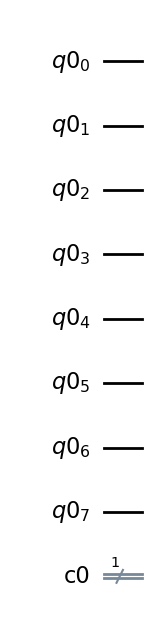

In [5]:
circ.draw('mpl')

# Systeme en place

In [6]:
circ.h(0)

In [7]:
circ.h(1)

In [8]:
circ.h(2)

In [9]:
circ.h(3)

# Etat1 : Les joueurs sont en place
-   Les 4 premières correspondent aux valeurs probables des couleurs de cheveux
-   Les 4 dernières correspondent aux valeurs prédites des couleurs de cheveux
Les valeurs de qubit de 0 à 3 sont inconues donc on les met en superposition avec une porte Hadamard

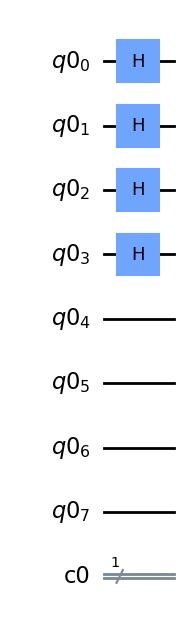

In [10]:
circ.draw('mpl')

In [11]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Etat2

In [12]:
circ.cx(1,4)

In [13]:
circ.cx(2,4)

In [14]:
circ.cx(3,4)

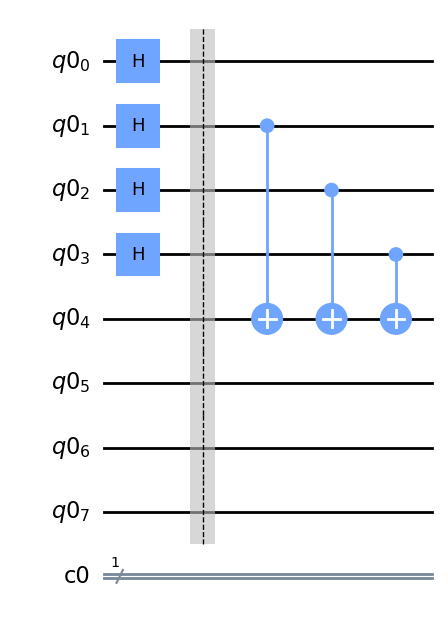

In [15]:
circ.draw('mpl')

 Le qubit 4 correspond à ce qu'observe votre joueur. ils faut donc lier les qubits 0 à 3 avec le qubit 4 avec des portes CNOT

In [16]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Etat3

In [17]:
circ.cx(4,5)

In [18]:
circ.cx(4,6)

In [19]:
circ.cx(4,7)

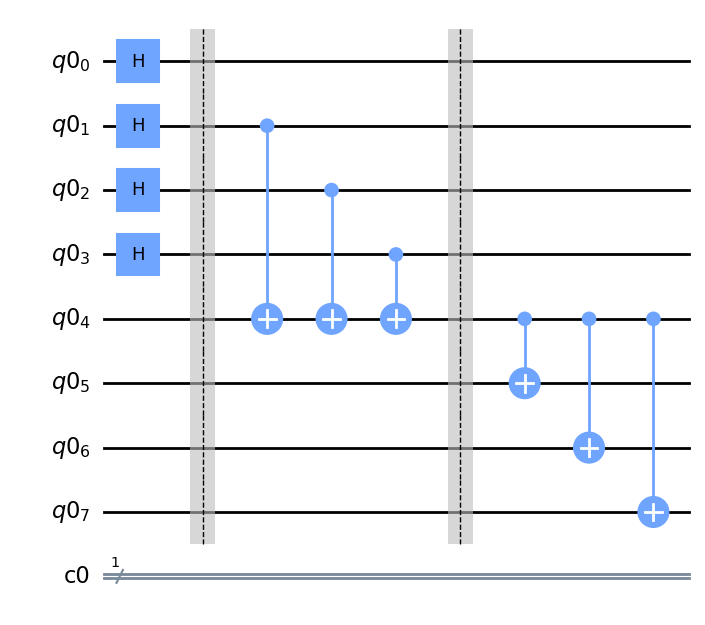

In [20]:
circ.draw('mpl')

Puis les autres joueurs entendent la réponse du premier joueur. On intrique le qubit 4 avec les qubits 5, 6 et 7

In [21]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Etat4

In [22]:
circ.cx(2,5)

In [23]:
circ.cx(3,5)

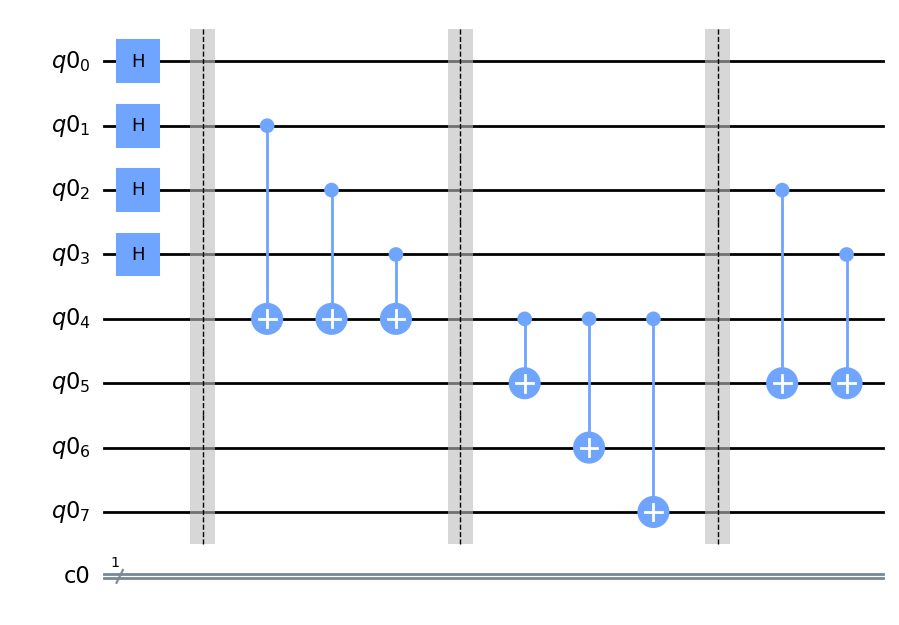

In [24]:
circ.draw('mpl')

Puis le second joueur va observer les chevelures devant lui. On intrique le 5 avec les qubits 2 et 3

In [25]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Etat 5

In [26]:
circ.cx(5,6)

In [27]:
circ.cx(5,7)

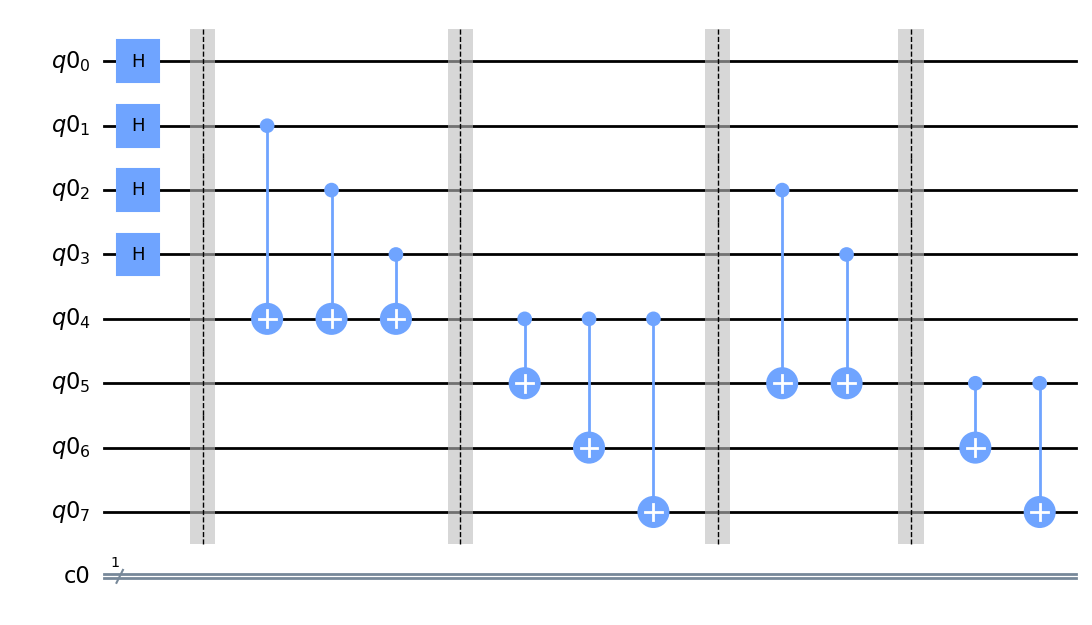

In [28]:
circ.draw('mpl')

# Etat 6

In [29]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

In [30]:
circ.cx(3,6)

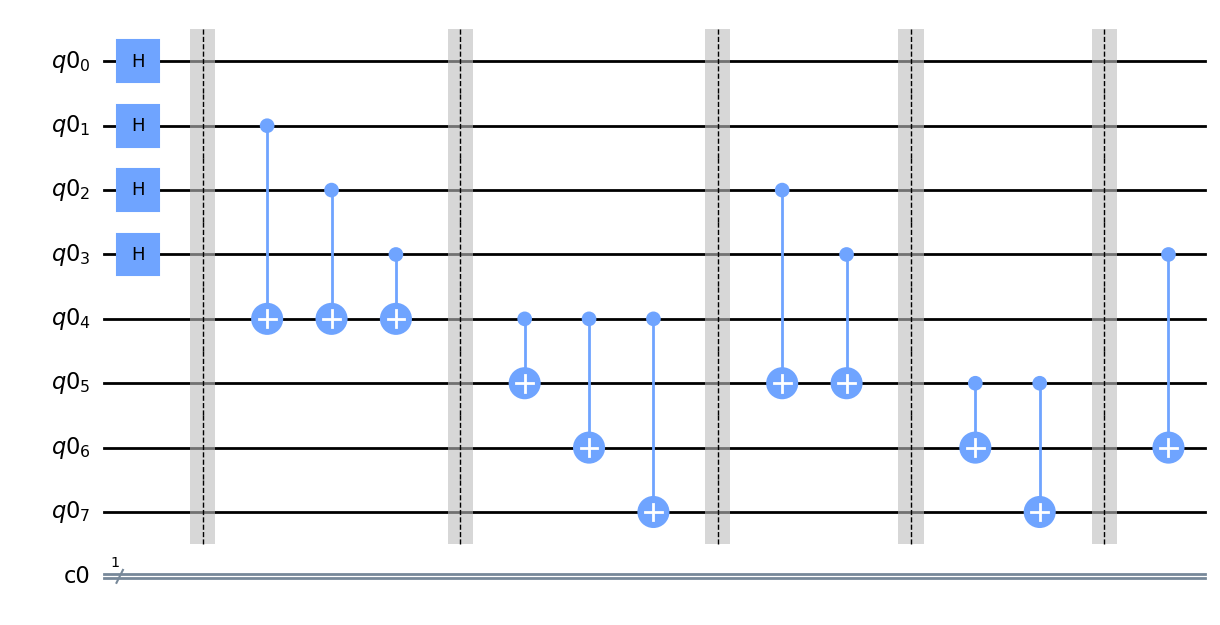

In [31]:
circ.draw('mpl')

Les 2 derniers participants vont entendre et l'avant-dernier va déduire sa couleur de cheveux. On intrique le qubit 5 avec les qubits 6 et 7. Puis l'avant-dernier participant va dire la couleur de celui qui est devant lui.

In [32]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Etat 7

In [33]:
circ.cx(6,7)

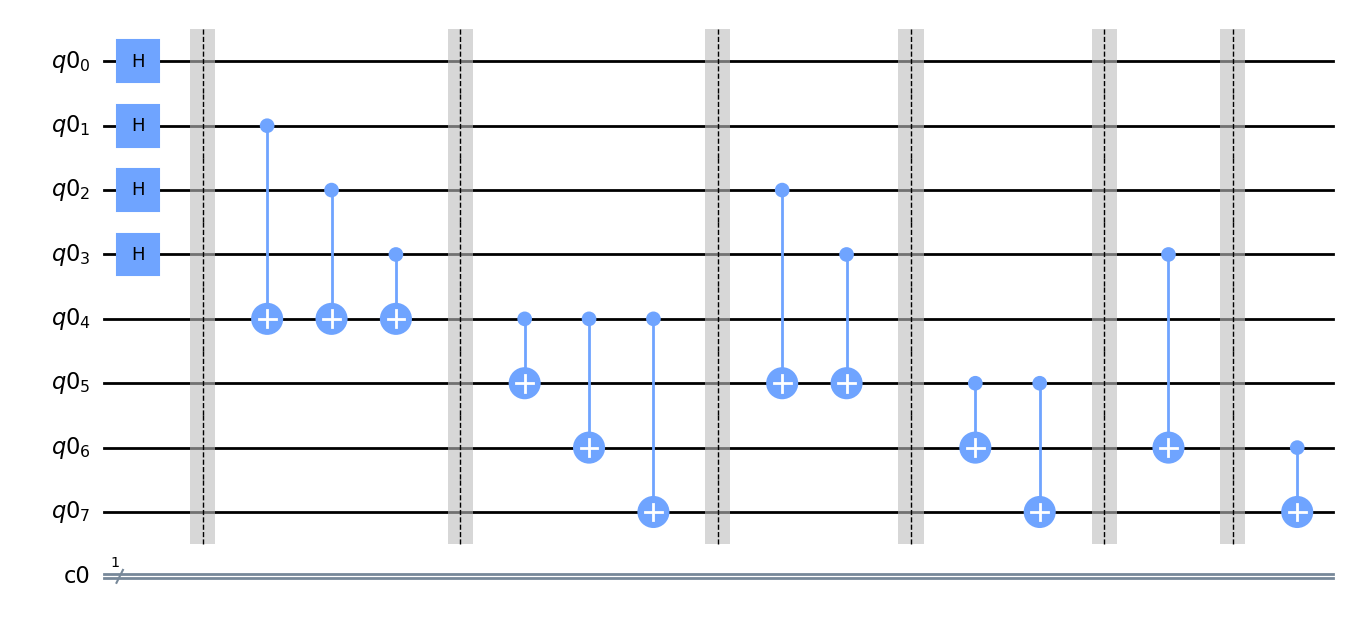

In [34]:
circ.draw('mpl')

In [35]:
circ.barrier(0, 1, 2, 3, 4, 5, 6, 7)

# Mesures

In [36]:
circ.measure(0,0)

In [37]:
circ.measure(1,0)

In [38]:
circ.measure(2,0)

In [39]:
circ.measure(3,0)

In [40]:
circ.measure(4,0)

In [41]:
circ.measure(5,0)

In [42]:
circ.measure(6,0)

In [43]:
circ.measure(7,0)

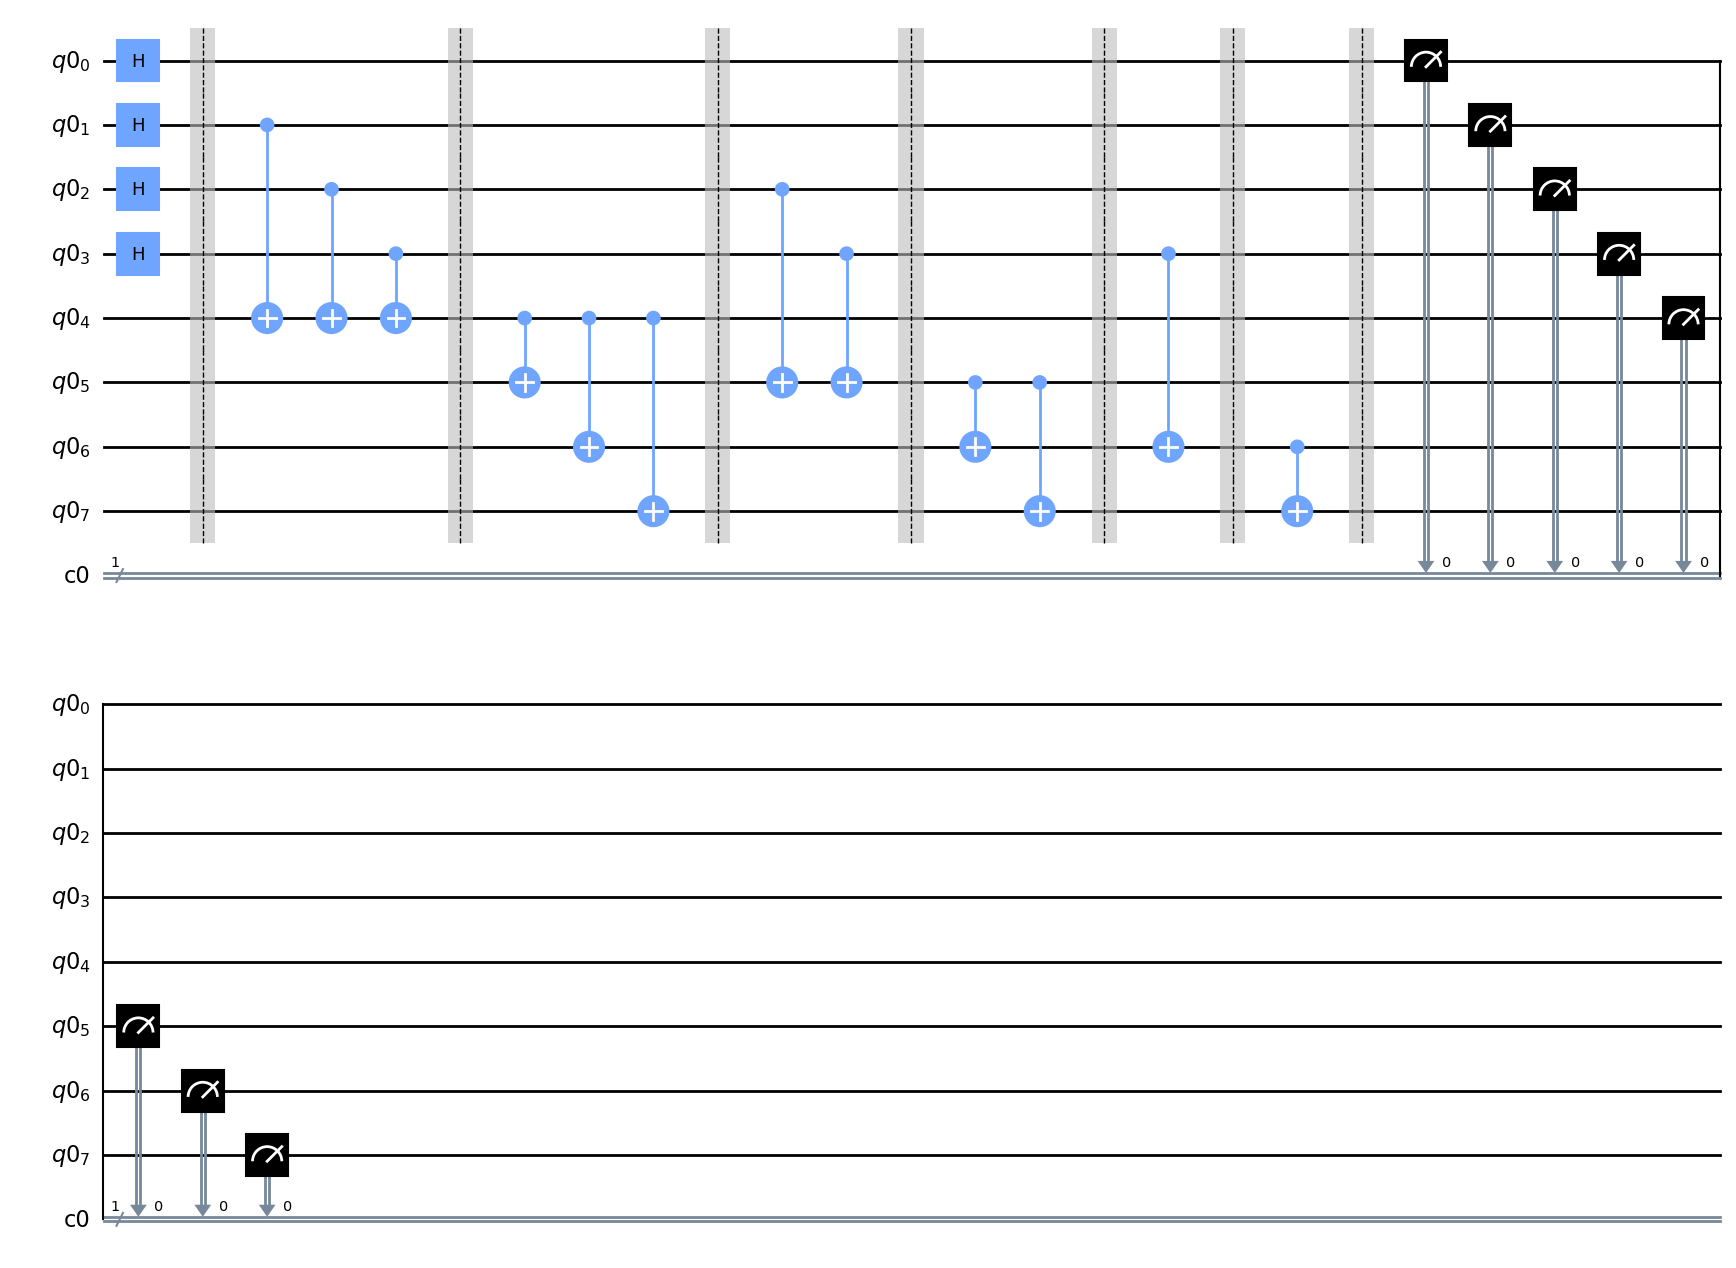

In [44]:
circ.draw('mpl')

Faisons un echantillonage pour deduire les probabilités d'obtenir chaque résultat

In [45]:
# backend = Aer.get_backend('statevector_simulator')
# job = backend.run(circ, shots=10000)
# res = job.result()
# outputstate = res.get_statevector(circ, decimals=3)

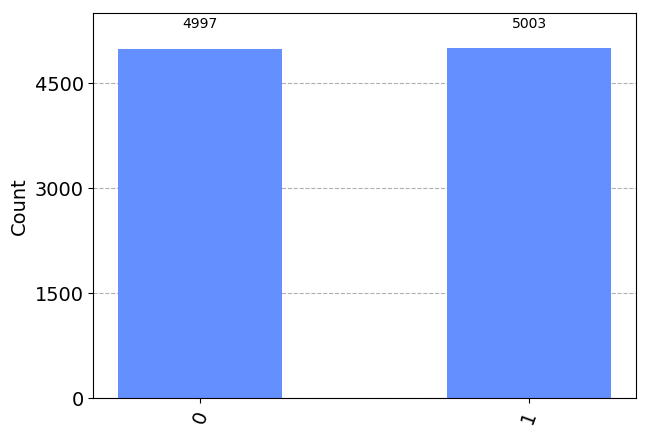

In [46]:
# plot_histogram(result.get_counts(circ))

In [47]:
# plot_bloch_multivector(outputstate)

ValueError: Unknown projection '3d'

<Figure size 1600x200 with 0 Axes>